In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2010 = pd.read_excel('online_retail.xlsx', sheet_name = 0)
df_2011 = pd.read_excel('online_retail.xlsx', sheet_name = 1)

In [3]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df_2010.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df_2011.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [7]:
df_2010.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
df_2011.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [9]:
df_2010.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

In [10]:
df_2011.nunique()

Invoice        25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
Price           1630
Customer ID     4372
Country           38
dtype: int64

## 1. Sales Trends Over Time

In [11]:
# Add a 'Month' and 'Quarter' column
df_2010['Month'] = df_2010['InvoiceDate'].dt.to_period('M')
df_2011['Month'] = df_2011['InvoiceDate'].dt.to_period('M')

df_2010['Quarter'] = df_2010['InvoiceDate'].dt.to_period('Q')
df_2011['Quarter'] = df_2011['InvoiceDate'].dt.to_period('Q')

In [12]:
# Monthly sales trends
monthly_sales_2010 = df_2010.groupby('Month')['Price'].sum()
monthly_sales_2011 = df_2011.groupby('Month')['Price'].sum()

In [13]:
# Quarterly sales trends
quarterly_sales_2010 = df_2010.groupby('Quarter')['Price'].sum()
quarterly_sales_2011 = df_2011.groupby('Quarter')['Price'].sum()

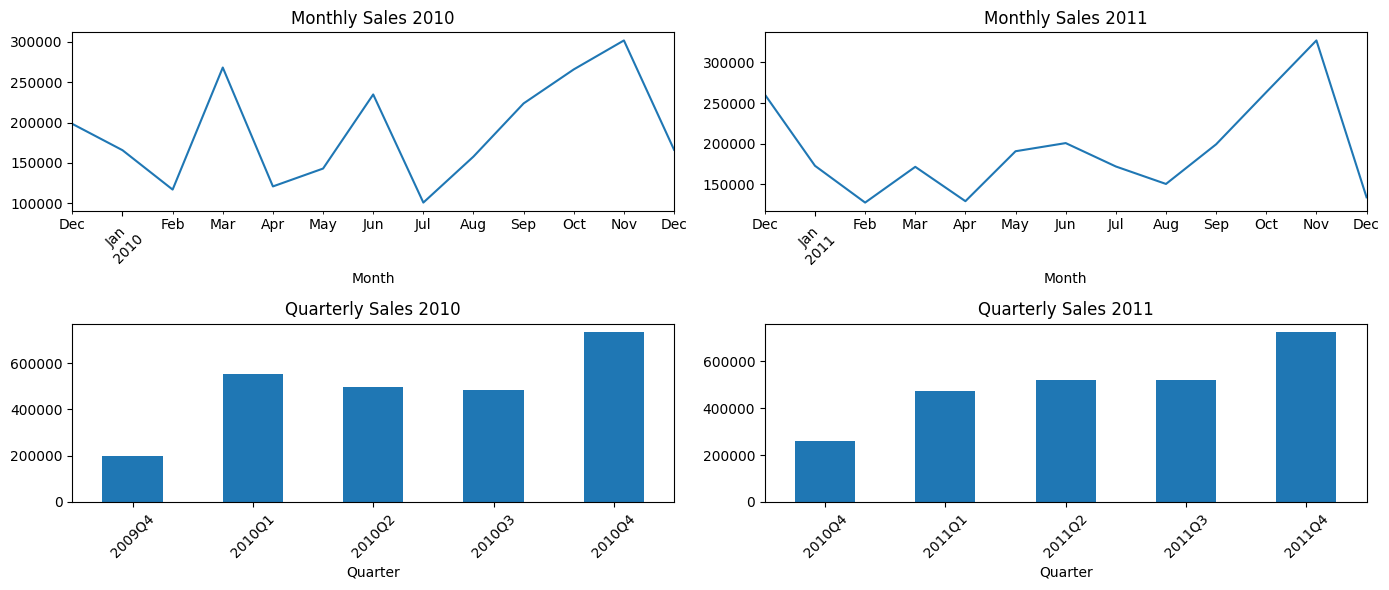

In [14]:
# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
monthly_sales_2010.plot(kind='line', title='Monthly Sales 2010')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
monthly_sales_2011.plot(kind='line', title='Monthly Sales 2011')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
quarterly_sales_2010.plot(kind='bar', title='Quarterly Sales 2010')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
quarterly_sales_2011.plot(kind='bar', title='Quarterly Sales 2011')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Overview
This analysis explores sales trends over the years 2010 and 2011, breaking down revenue on a monthly and quarterly basis to identify high and low sales periods.

### Monthly Sales Trends
The line charts above illustrate the total sales revenue for each month in 2010 and 2011. Key observations include:

- **2010**: There are noticeable peaks in March, October, and November, which could indicate cyclical buying patterns or successful promotional campaigns during these months.
  
- **2011**: Similar trends are seen with peaks in November, potentially aligning with pre-holiday purchases or annual events.

### Quarterly Sales Trends
The bar charts demonstrate quarterly sales performance for each year:

- **2010**: The first and last quarters (Q1 and Q4) show the highest sales. This might suggest seasonal influences or effective end-of-year strategies.

- **2011**: Again, Q1 and Q4 outpace other quarters, indicating a recurring annual trend or successful promotions during these times.

### Conclusion
The data highlights recurring patterns that can inform future sales strategies, such as targeting specific months and quarters for promotional activities to maximize revenue.

## 2. Top Products by Quantity and Revenue

In [15]:
# Top products by quantity
top_products_qty_2010 = df_2010.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_qty_2011 = df_2011.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

print("Top Products by Quantity 2010:")
print(top_products_qty_2010)
print("\nTop Products by Quantity 2011:")
print(top_products_qty_2011)

Top Products by Quantity 2010:
Description
WHITE HANGING HEART T-LIGHT HOLDER    57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54698
BROCADE RING PURSE                    47647
PACK OF 72 RETRO SPOT CAKE CASES      46106
ASSORTED COLOUR BIRD ORNAMENT         44925
60 TEATIME FAIRY CAKE CASES           36326
PACK OF 60 PINK PAISLEY CAKE CASES    31822
JUMBO BAG RED RETROSPOT               30727
SMALL POPCORN HOLDER                  29500
STRAWBERRY CERAMIC TRINKET BOX        26563
Name: Quantity, dtype: int64

Top Products by Quantity 2011:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name

### Analysis of Top Products by Quantity

The analysis of best-selling products by quantity for 2010 and 2011 reveals consistent top performers, such as the **World War 2 Gliders Assorted Designs** and **Jumbo Bag Red Retrospot**. These items indicate strong consumer demand and can guide strategic decisions in inventory management and marketing. Notably, some products maintained high sales across both years, suggesting enduring popularity and potential for continued promotional focus.

In [16]:
# Top products by revenue
df_2010['Revenue'] = df_2010['Quantity'] * df_2010['Price']
df_2011['Revenue'] = df_2011['Quantity'] * df_2011['Price']

top_products_revenue_2010 = df_2010.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products_revenue_2011 = df_2011.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

print("\nTop Products by Revenue 2010:")
print(top_products_revenue_2010)
print("\nTop Products by Revenue 2011:")
print(top_products_revenue_2011)


Top Products by Revenue 2010:
Description
REGENCY CAKESTAND 3 TIER               163051.46
WHITE HANGING HEART T-LIGHT HOLDER     157865.43
DOTCOM POSTAGE                         116401.99
ASSORTED COLOUR BIRD ORNAMENT           72454.12
PAPER CHAIN KIT 50'S CHRISTMAS          57870.20
JUMBO BAG RED RETROSPOT                 56444.61
PARTY BUNTING                           49645.52
ROTATING SILVER ANGELS T-LIGHT HLDR     47672.49
POSTAGE                                 46092.36
JUMBO BAG STRAWBERRY                    36699.61
Name: Revenue, dtype: float64

Top Products by Revenue 2011:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66248.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED C

The examination of top products by revenue for 2010 and 2011 highlights several high-earning items:

### 2010 Insights
- **Regency Cakestand 3 Tier** and **White Hanging Heart T-Light Holder** are the leading revenue generators, suggesting their high demand and premium pricing.
- **Dotcom Postage**, which appears in both years, indicates that additional services or shipping costs are significant revenue contributors.

### 2011 Insights
- **Dotcom Postage** tops the list, followed by **Regency Cakestand 3 Tier**, maintaining their positions as major revenue contributors.
- Items like **Party Bunting** and **Jumbo Bag Red Retrospot** consistently appear, indicating steady consumer interest.

### Conclusion
Products with consistent high revenue across years should be prioritized in marketing strategies and stock management. The significant role of items like **Dotcom Postage** suggests exploring potential revenue streams in service-related areas.

## 3. Customer Segmentation by Contribution to Sales

In [17]:
# Total revenue per customer
customer_revenue_2010 = df_2010.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False)
customer_revenue_2011 = df_2011.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False)

print("\nTop Customers by Revenue 2010:")
print(customer_revenue_2010.head(10))
print("\nTop Customers by Revenue 2011:")
print(customer_revenue_2011.head(10))


Top Customers by Revenue 2010:
Customer ID
18102.0    341776.73
14646.0    243853.05
14156.0    183180.55
14911.0    137675.91
13694.0    128172.42
17511.0     83760.60
15061.0     82162.74
16684.0     75610.17
13089.0     55828.31
16754.0     54558.18
Name: Revenue, dtype: float64

Top Customers by Revenue 2011:
Customer ID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Revenue, dtype: float64


### Overview
Analyzing top customers by revenue for 2010 and 2011 provides insights into key client relationships and their contribution to overall sales.

### 2010 Insights
- Customer **18102** leads with revenue of 341,776.73, showcasing their significant contribution to sales.
- Other major customers, such as **14646** and **14156**, also demonstrate high spending, indicating potential for tailored marketing or loyalty programs.

### 2011 Insights
- Although the leaderboard shifts slightly, **14646** becomes the top customer with a revenue of 279,489.02.
- Customers such as **14911** and **17511** remain consistent, showing strong repeat purchasing behavior.

### Conclusion
These insights highlight the importance of maintaining strong relationships with top customers. Strategies could include personalized offers or loyalty initiatives to further enhance engagement and revenue from these key segments.

# Combined Analysis: Products and Customer Revenue

## Overview
This combined analysis examines the top products by quantity and revenue alongside the most profitable customers for the years 2010 and 2011. Understanding these dynamics offers comprehensive insights into sales performance and customer behavior.

## Key Findings

### Top Products
- Popular products like **Regency Cakestand 3 Tier** and **White Hanging Heart T-Light Holder** play crucial roles in revenue generation, suggesting strong customer demand and potential premium pricing strategies.
- **World War 2 Gliders Assorted Designs** and **Jumbo Bag Red Retrospot** consistently rank high in quantity sold, indicating a broad customer base and reliable sales volume.

### Revenue Insights
- **Dotcom Postage** emerges as a notable revenue stream, highlighting the impact of shipping and additional services on overall earnings.

### Customer Contributions
- Top customers such as **18102** and **14646** contribute significantly to sales, with substantial revenue generated from each, underscoring the value of maintaining these relationships.

## Strategic Implications
- **Product Focus**: Prioritize inventory and marketing strategies around top-selling and high-revenue products, ensuring adequate stock and promotional support.
- **Customer Engagement**: Enhance engagement with key customers through personalized marketing and loyalty programs to maintain and possibly increase their spending.
- **Service and Shipping**: Explore further monetization of services like shipping which contribute significantly to revenue.

By integrating product and customer analyses, businesses can craft targeted strategies that maximize both revenue potential and customer satisfaction.

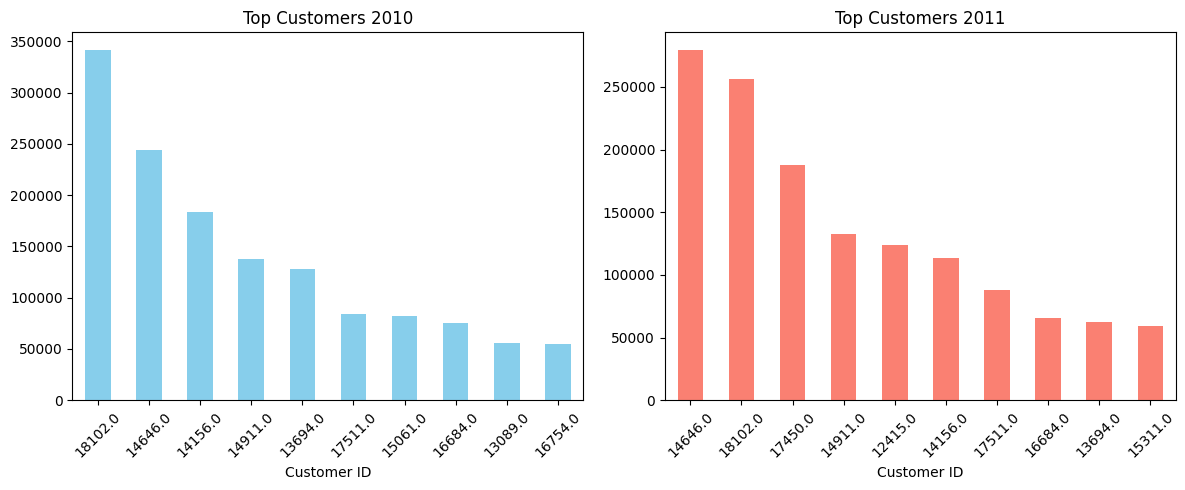

In [18]:
# Visualizing top 10 customers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
customer_revenue_2010.head(10).plot(kind='bar', title='Top Customers 2010', color='skyblue')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
customer_revenue_2011.head(10).plot(kind='bar', title='Top Customers 2011', color='salmon')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Visualization: Top Customers by Revenue

## Overview
The bar charts illustrate the top customers by revenue for the years 2010 and 2011, highlighting significant contributors to sales.

## Insights

### 2010
- **Customer 18102** stands out as the highest revenue generator, indicating a strong purchase history and potential for focused customer engagement.
- The majority of revenue is concentrated among a few top customers, suggesting a reliance on key relationships.

### 2011
- **Customer 14646** emerges as the top contributor, with other loyal customers like **18102** maintaining high revenue figures.
- The distribution remains top-heavy, reinforcing the importance of nurturing relationships with high-value customers.

## Strategic Implications
- **Customer Retention**: Implement loyalty and retention programs targeting these top customers to maintain and grow their contribution.
- **Personalized Marketing**: Tailor marketing efforts to these customers to maximize their satisfaction and spending.
- **Risk Mitigation**: Consider strategies to diversify the customer base to reduce potential revenue risk from dependency on a few customers.

These visualizations emphasize the critical role of top customers in sales performance, guiding strategies for engagement and growth.